# Try to solve these task with as few lines of code as possible:

In [2]:
import numpy as np

* Generate a sequence like this one: a = [0, 2, 4, ..., 20]

In [6]:
a = np.arange(start=0, stop=21, step=2)
print(a)

[ 0  2  4  6  8 10 12 14 16 18 20]


* Make a new array with only elements that can be evenly divided by 3, i.e. [6, 12, 18], e.g. by using a mask

In [12]:
a2 = a[(a % 3 == 0) & (a > 0)]
print(a2)

[ 6 12 18]


* Replace these elements i in the [6, 12, 18] array with i/3

In [13]:
a3 = a2/3
print(a3)

[2. 4. 6.]


* Make a 2D array of dimension 5x5 where the upper right triangle is 1, the rest 0

In [15]:
a = np.triu(np.ones((5,5)))
print(a)

[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


* Calculate the angle between two vectors [1, 2, 3] and [3, 4, 7]
(Hint: https://en.wikipedia.org/wiki/Angular_distance#Equation or use vector products)

In [32]:
# Transform from cartesian coordinates x,y,z into spherical theta, phi
# using:
# https://en.wikipedia.org/wiki/Spherical_coordinate_system#Cartesian_coordinates
a = np.array([1, 2, 3])
b = np.array([3, 4, 7])
theta_a = np.arctan(np.sqrt(a[0]**2+a[1]**2)/a[2])
phi_a = np.arctan(a[1]/a[0])
theta_b = np.arctan(np.sqrt(b[0]**2+b[1]**2)/b[2])
phi_b = np.arctan(b[1]/b[0])
print(f'theta_a={np.rad2deg(theta_a):.1f} deg, phi_a={np.rad2deg(phi_a):.1f} deg')
print(f'theta_b={np.rad2deg(theta_b):.1f} deg, phi_b={np.rad2deg(phi_b):.1f} deg')
psi = np.arccos(
    np.sin(theta_a)*np.sin(theta_b) + 
    np.cos(theta_a)*np.cos(theta_b)*np.cos(phi_a-phi_b)
)
print(f'psi = {np.rad2deg(psi):.1f} deg')

theta_a=36.7 deg, phi_a=63.4 deg
theta_b=35.5 deg, phi_b=53.1 deg
psi = 8.4 deg


* Repeat the 'dice' task from the basic exercises with numpy random functions. Is this faster?

In [68]:
def numpy_dice(print_result=True):
    counter = 0
    block_size = 64
    while True:
        numbers = np.random.randint(1, 7, size=block_size)
        m = (np.diff(numbers) == 0) & (numbers[1:] == 6)
        if np.any(m):
            idx = np.argwhere(m)[0,0]
            counter += idx + 2
            if print_result:
                print(f"You've won! after {counter} rolls!")
            return counter
        counter += block_size
numpy_dice()

You've won! after 24 rolls!


24

In [69]:
from random import randint
def python_dice(print_result=True):
    last_number = 0
    counter = 0
    while True:
        dice_number = randint(1, 6)
        if last_number==6 and dice_number==6:
            if print_result:
                print(f"You've won! after {counter} rolls!")
            return counter
        else:
            counter += 1
            last_number = dice_number
python_dice()

You've won! after 7 rolls!


7

In [67]:
%%timeit
numpy_dice(print_result=False)

40.6 µs ± 206 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [55]:
%%timeit
python_dice(print_result=False)

23.3 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


* Bonus: Cross-check your solutions for the vector functions from `02_exercises_functions_algorithms.ipynb` with numpy.
* Bonus: Check how the runtime of your own implementation of the vector functions is compared to numpy.
* Bonus: Repeat the angle task above with two sets of vectors at once: [[1, 2, 3], [3, 4, 7]] and [[2, 1, 3], [5, 4, 1]]


* If you want to work on more basic exercises, you can find some here https://www.machinelearningplus.com/python/101-numpy-exercises-python/

# Task: Integrations and plots for different functions:

Use `numpy`'s functions to define the functions below and plot them!

* $f(x) = 4x^4 - 2x^2 + 7$
* $f(x) = 1/x^2$
* Exponential function
* Gaussian function

In [81]:
def f1(x):
    return 4*np.power(x, 4) - 2*np.power(x, 2) + 7
def f2(x):
    return 1/np.power(x, 2)
def f3_exp(x):
    return np.exp(x)
def f4_gauss(x, mu=0, sigma=1):
    return (
        1/(sigma*np.sqrt(2*np.pi)) * 
        np.exp(-0.5*np.power(x-mu, 2)/np.power(sigma, 2))
    )

In [72]:
from matplotlib import pyplot as plt

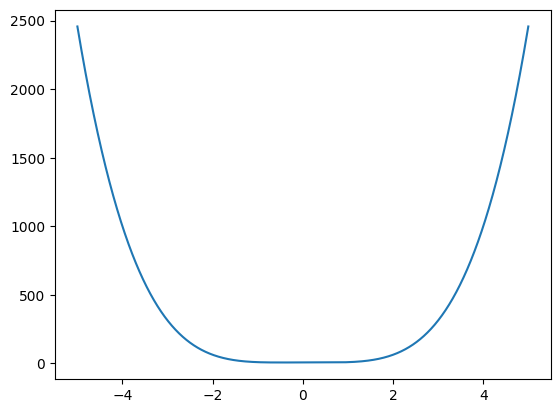

In [75]:
x = np.linspace(-5, 5, 2000)
plt.figure()
plt.plot(x, f1(x))

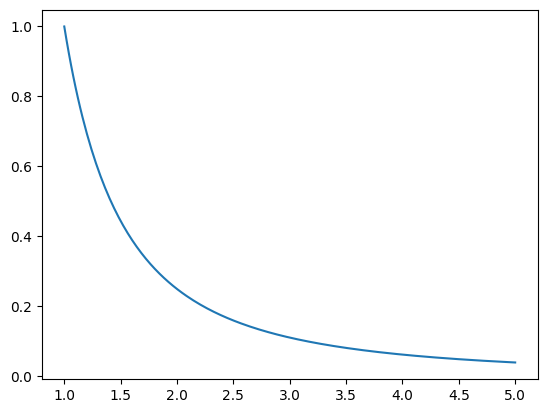

In [77]:
x = np.linspace(1, 5, 200)
plt.figure()
plt.plot(x, f2(x))

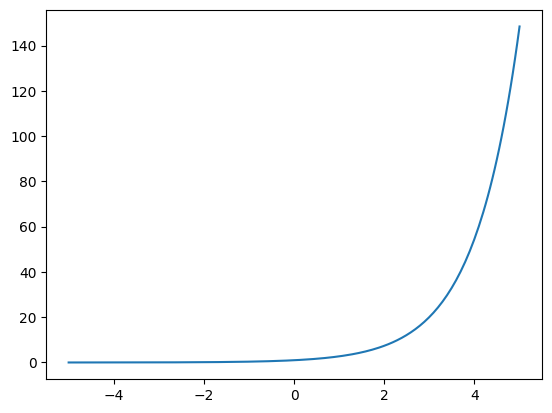

In [80]:
x = np.linspace(-5, 5, 200)
plt.figure()
plt.plot(x, f3_exp(x))

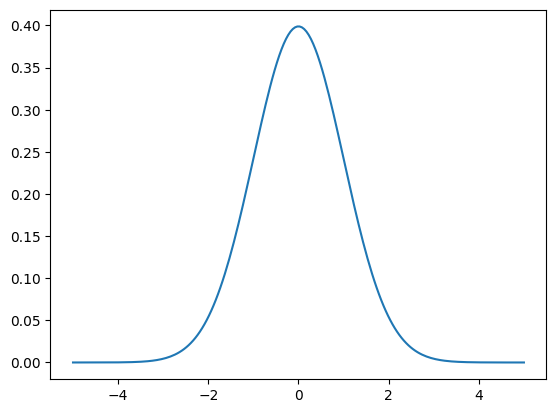

In [82]:
x = np.linspace(-5, 5, 200)
plt.figure()
plt.plot(x, f4_gauss(x))

Bonus: Plot a 2D Gaussian function! Think about how this could be visualized (There are different options.)

Histograms:
* We've seen the exponential distribution made from random numbers and plotted in a histogram.
Try the same with a Gaussian distributions with mean 3 and width 2!
* Bonus: Plot the 2D histogram of 2D Gaussian random numbers!


With `scipy`:
* Use `quad` to integrate the functions and plot them. 
* Bonus: Calculate the integrated functions yourself and cross-check your results!

# Advanced Task: Random number generation & fitting

Imagine you want to measure the mass of apples as a function of the time they were harvested!
1. Generate a random dataset of apple masses and corresponding times. For example, apples could get heavier with time. Make up some relation! It's not important how exactly you do this, just think about how these two quantities might relate (linearly? logarithmic?) and generate the data set accordingly.
2. Determine the parameters of the function that best describes the relation of apple mass and harvesting time. (you know the function, of course, because you used it to build the data set!). 
3. Try to see if the parameters you found are reasonable. Maybe do a visual check?
4. Bonus: calculate by how much the apple masses deviate from your model expectation, using the function and parameters that you calculated in 2. What kind of distribution do the deviations follow?